In [14]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [262]:
def plot_points(data, title="Bike"):
    x = data[0]
    y = data[1]
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data points")
    plt.title(title)
    plt.legend()
    plt.show()

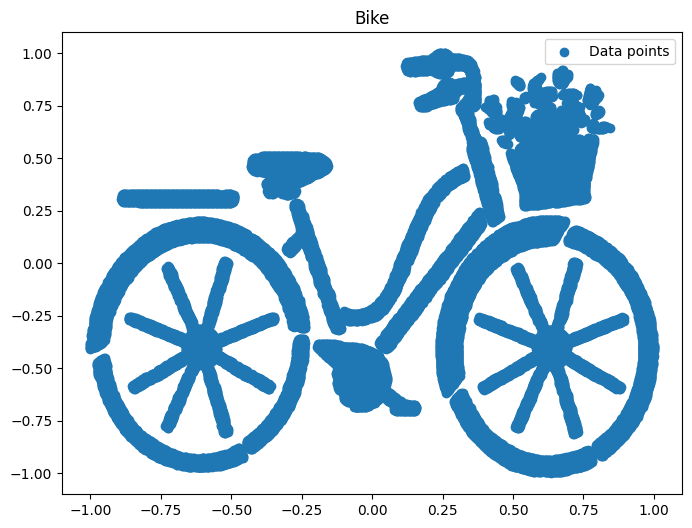

In [263]:
file_path = "bicycle.txt"

data = pd.read_csv(file_path, delimiter=" ", header=None)

x = data[0]
y = data[1]

plot_points(data)

In [209]:
T = 1000
beta_tab = np.linspace(0.0001, 0.02, T)
alpha_tab = 1 - beta_tab
alpha2_tab = np.cumprod(alpha_tab)

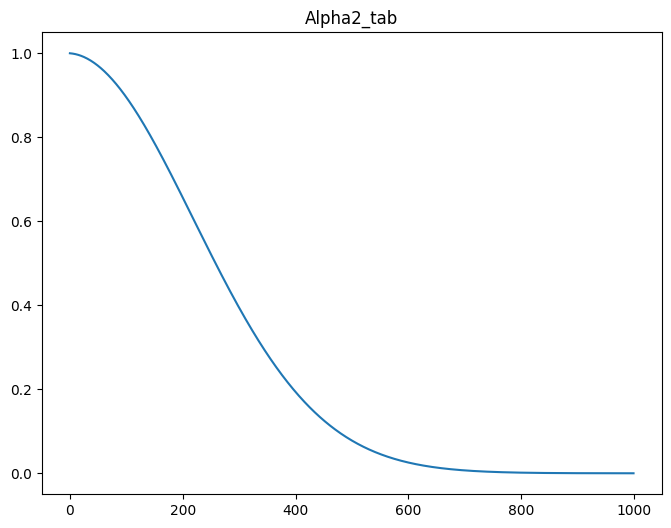

In [210]:
plt.figure(figsize=(8, 6))
plt.plot(alpha2_tab)
plt.title("Alpha2_tab")
plt.show()

In [217]:
def sigmoidal_function(T):
    x = np.linspace(0, T, T)
    return 1 / (1 + np.exp(10 / T * (x - T/2)))

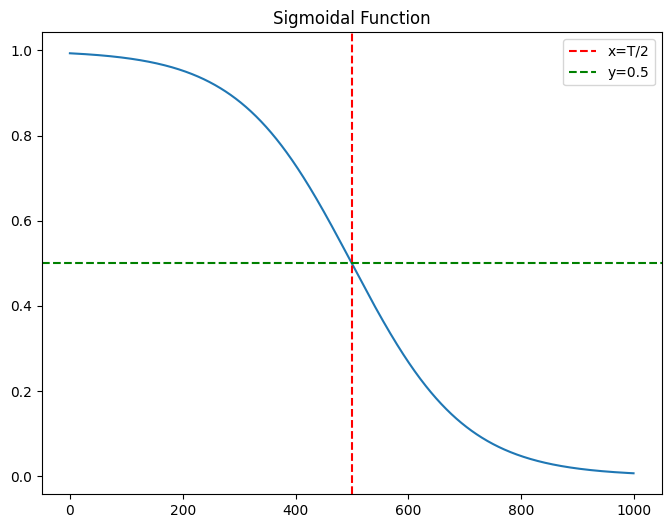

In [218]:
plt.figure(figsize=(8, 6))
plt.plot(sigmoidal_function(T))
plt.title("Sigmoidal Function")
plt.axvline(T / 2, color="red", linestyle="--", label="x=T/2")
plt.axhline(0.5, color="green", linestyle="--", label="y=0.5")
plt.legend()
plt.show()

In [229]:
alpha2_tab = sigmoidal_function(T)
alpha_tab = alpha2_tab[1:] / alpha2_tab[:-1]
beta_tab = 1 - alpha_tab

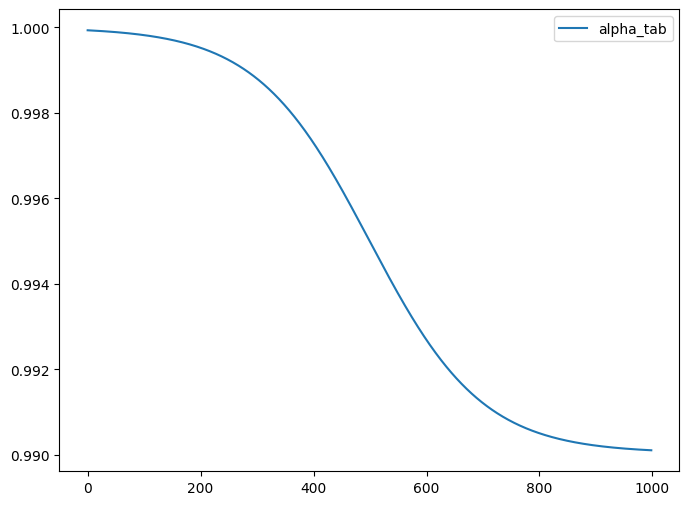

In [230]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_tab, label="alpha_tab")
plt.legend()
plt.show()

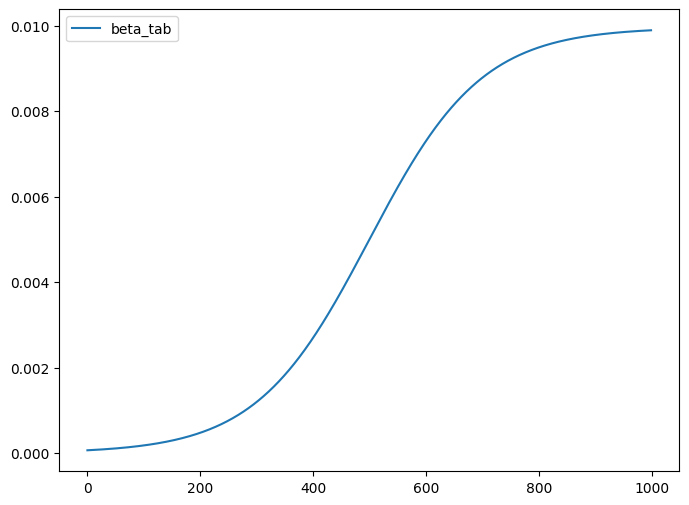

In [231]:
# plot beta_tab
plt.figure(figsize=(8, 6))
plt.plot(beta_tab, label="beta_tab")
plt.legend()
plt.show()

In [266]:
data_t = [pd.DataFrame() for _ in range(T)]
data_t[0] = data
for t in range(1, T):
    data_t[t] = pd.DataFrame({
        0: np.random.normal(np.sqrt(alpha2_tab[t]) * x, (1 - alpha2_tab[t])),
        1: np.random.normal(np.sqrt(alpha2_tab[t]) * y, (1 - alpha2_tab[t]))
    })


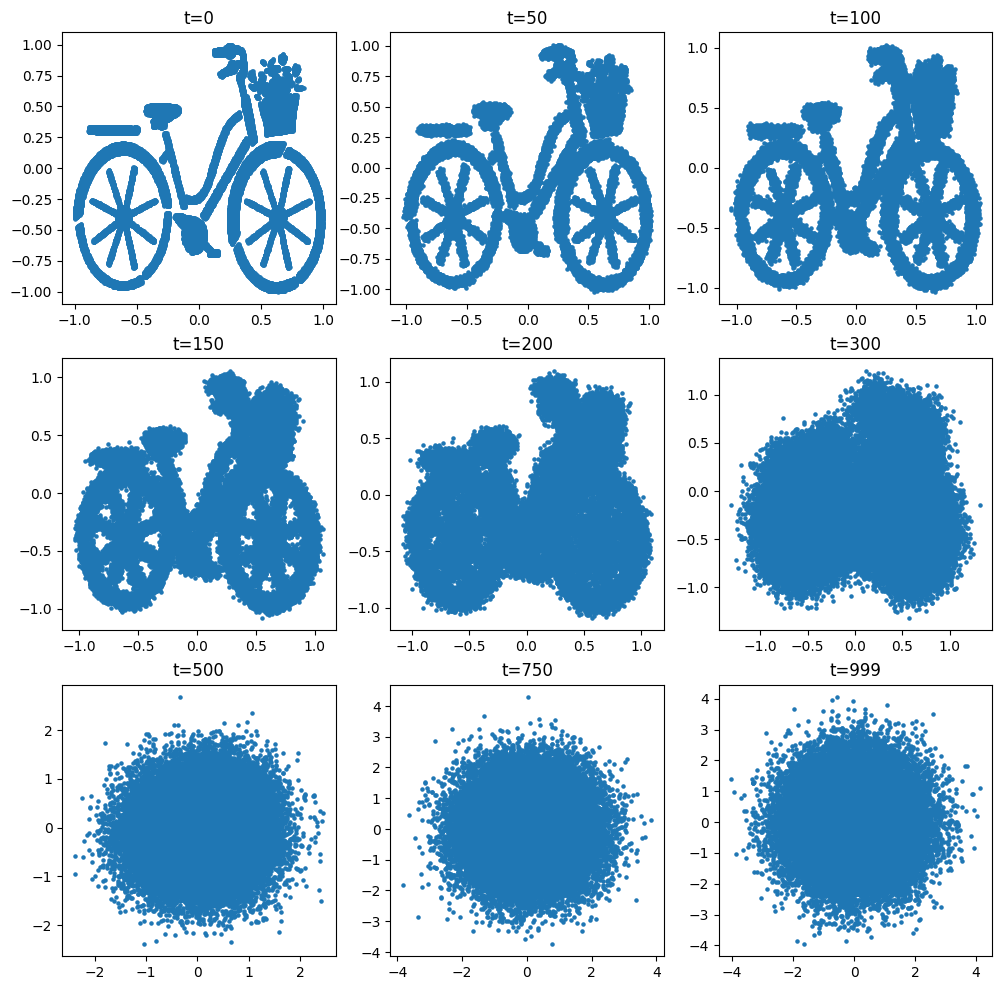

In [291]:
t_values = [0, 50, 100, 150, 200, 300, 500, 750, 999]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(t_values):
            t = t_values[idx]
            axes[i, j].scatter(data_t[t][0], data_t[t][1], s=5)
            axes[i, j].set_title(f"t={t}")
        else:
            axes[i, j].axis('off')
plt.show()

In [ ]:
def forward_diffussion(data, T=1000):
    beta_tab = np.linspace(0.0001, 0.02, T)
    alpha_tab = 1 - beta_tab
    alpha2_tab = np.cumprod(alpha_tab)
    